In [1]:
%load_ext autoreload
%autoreload 2
import sys
sys.path.append("../")

In [2]:
from src.graph import NetworkGraph

In [3]:
from flatland.envs.rail_env import RailEnv
from flatland.envs.observations import *
from flatland.envs.rail_generators import complex_rail_generator,rail_from_manual_specifications_generator,random_rail_generator, RailGenerator
from flatland.envs.schedule_generators import complex_schedule_generator, random_schedule_generator, ScheduleGenerator
from flatland.utils.rendertools import RenderTool

In [4]:
from src.MAPF.solver import Shortest_Path_with_waiting

In [5]:
import networkx as nx
import numpy as np
import matplotlib.pyplot as plt

In [6]:
number_agents = 12

size_side = 7
env = RailEnv(width=size_side,
              height=size_side,
              rail_generator=complex_rail_generator(nr_start_goal=10, nr_extra=1, 
                                                    min_dist=6, max_dist=99999, 
                                                    seed = np.random.randint(0,2000)),
              schedule_generator=complex_schedule_generator(),
              number_of_agents=number_agents,
              obs_builder_object=GlobalObsForRailEnv())

env.reset()



env_renderer = RenderTool(env)
env_renderer.render_env(show=True, show_predictions=False, show_observations=False)

complex_rail_generator: num_agents > nr_start_goal, changing num_agents


In [7]:
matrix_rail = np.array(env.rail.grid.tolist())

In [53]:
test = NetworkGraph(matrix_rail)

cycles detected, this may be due to the fact that endpoint can be used to do 180 turn


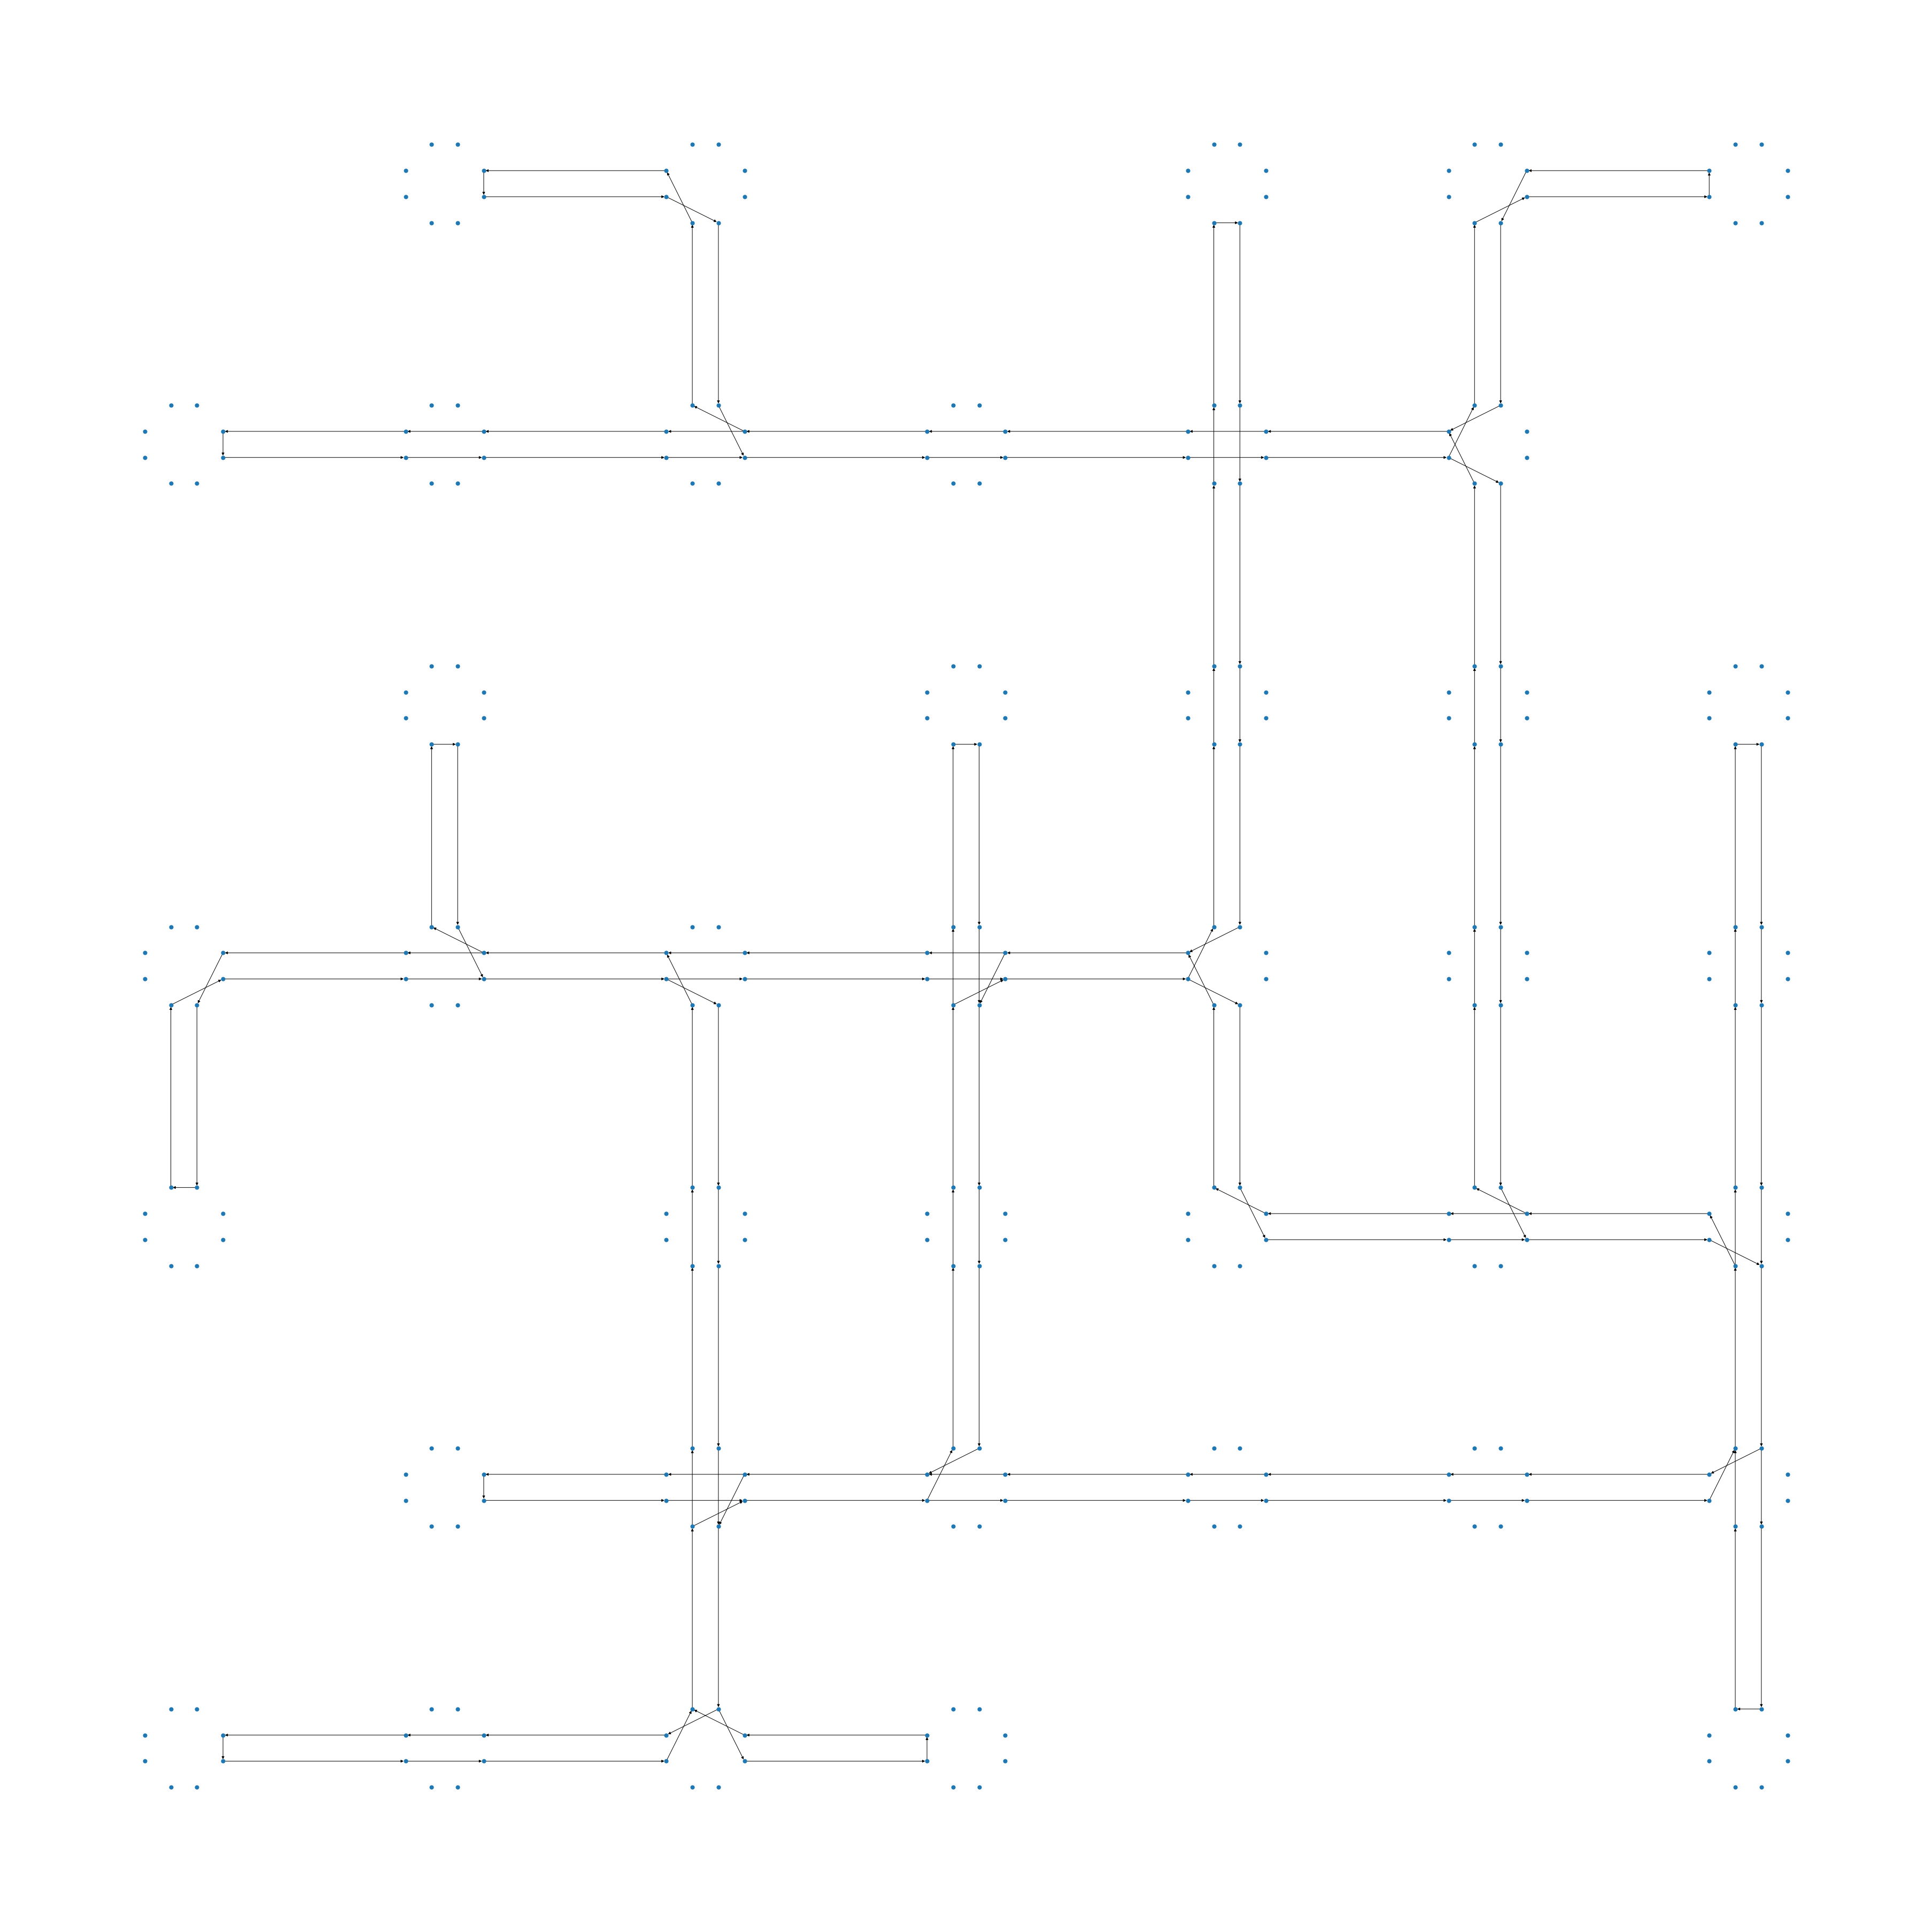

In [54]:
test.show(jitter = 0.1)

In [38]:
import json
print([test.get_cell_position_node(x.split("_")[0]) for x in list(test.nodes)])

[(0, 1), (0, 1), (0, 1), (0, 1), (0, 1), (0, 1), (0, 1), (0, 1), (0, 2), (0, 2), (0, 2), (0, 2), (0, 2), (0, 2), (0, 2), (0, 2), (0, 4), (0, 4), (0, 4), (0, 4), (0, 4), (0, 4), (0, 4), (0, 4), (0, 5), (0, 5), (0, 5), (0, 5), (0, 5), (0, 5), (0, 5), (0, 5), (0, 6), (0, 6), (0, 6), (0, 6), (0, 6), (0, 6), (0, 6), (0, 6), (1, 0), (1, 0), (1, 0), (1, 0), (1, 0), (1, 0), (1, 0), (1, 0), (1, 1), (1, 1), (1, 1), (1, 1), (1, 1), (1, 1), (1, 1), (1, 1), (1, 2), (1, 2), (1, 2), (1, 2), (1, 2), (1, 2), (1, 2), (1, 2), (1, 3), (1, 3), (1, 3), (1, 3), (1, 3), (1, 3), (1, 3), (1, 3), (1, 4), (1, 4), (1, 4), (1, 4), (1, 4), (1, 4), (1, 4), (1, 4), (1, 5), (1, 5), (1, 5), (1, 5), (1, 5), (1, 5), (1, 5), (1, 5), (2, 1), (2, 1), (2, 1), (2, 1), (2, 1), (2, 1), (2, 1), (2, 1), (2, 3), (2, 3), (2, 3), (2, 3), (2, 3), (2, 3), (2, 3), (2, 3), (2, 4), (2, 4), (2, 4), (2, 4), (2, 4), (2, 4), (2, 4), (2, 4), (2, 5), (2, 5), (2, 5), (2, 5), (2, 5), (2, 5), (2, 5), (2, 5), (2, 6), (2, 6), (2, 6), (2, 6), (2, 6),